In [25]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from allison.nn.layers import LayerDense
from allison.nn.models import NeuralNetwork
from allison.utils.functions.data import train_test_split
from allison.utils.functions.loss import categorical_cross_entropy
from allison.utils.functions.activation import sigmoid,softmax
from allison.utils.metrics import accuracy
from allison.utils.functions.transforms import get_numeric_labels

Dataset

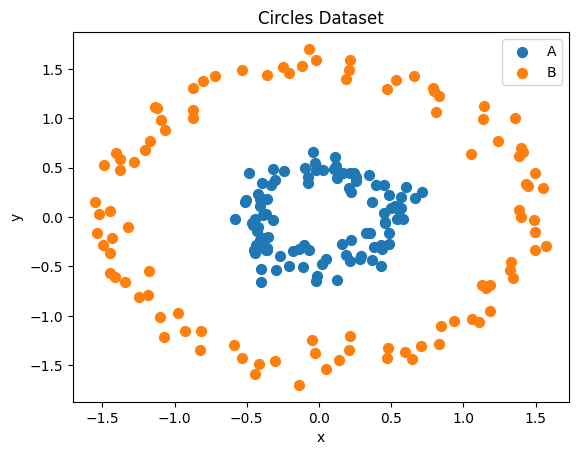

In [26]:
r1=0.5
r2=1.5
thetas = np.linspace(0,2*np.pi,100)
x1=r1*np.cos(thetas) + 0.1*np.random.randn(100)
y1=r1*np.sin(thetas) + 0.1*np.random.randn(100)
x2=r2*np.cos(thetas) + 0.1*np.random.randn(100)
y2=r2*np.sin(thetas) + 0.1*np.random.randn(100)

plt.scatter(x1,y1,s=50,label="A")
plt.scatter(x2,y2,s=50,label="B")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circles Dataset")
plt.legend()

In [27]:
x=x1.tolist()+x2.tolist()
y=y1.tolist()+y2.tolist()
tags = ["A" for x in x1.tolist()] + ["B" for x in x2.tolist()]
df=pd.DataFrame({
    "x":x,
    "y":y,
    "tags":tags
})
df.head()

,x,y,tags
0,0.552668,0.072059,A
1,0.569400,0.200313,A
2,0.458850,-0.058166,A
3,0.663877,0.191437,A
4,0.499527,0.094917,A


Split data for train and test

In [28]:
data_train, data_test = train_test_split(df,0.8)

Selecting features and labels

In [29]:
features = ["x", "y"]
labels = ["tags"]

Train data

In [30]:
features_train = data_train[features].to_numpy()
labels_train=pd.get_dummies(data_train[labels]).to_numpy()
print(features_train.shape,labels_train.shape)

(168, 2) (168, 2)


Test data

In [31]:
features_test = data_test[features].to_numpy()
labels_test=pd.get_dummies(data_test[labels]).to_numpy()
print(features_test.shape,labels_test.shape)

(32, 2) (32, 2)


Build a Neural Network

In [34]:
model = NeuralNetwork(categorical_cross_entropy,accuracy, 0.005)
model.add_layer(LayerDense(4,2,sigmoid))
model.add_layer(LayerDense(2,4,softmax))
model.summary()

Layer:1, neurons:4, input:(n,2), weights:(2,4), output:(n,4), activation:sigmoid 

Layer:2, neurons:2, input:(n,4), weights:(4,2), output:(n,2), activation:softmax 

Total -> Layers:2, neurons:6, weights:16, bias:6 params:22 

Loss function: categorical_cross_entropy 

Metric: accuracy 

Learning Rate: 0.005 



Training

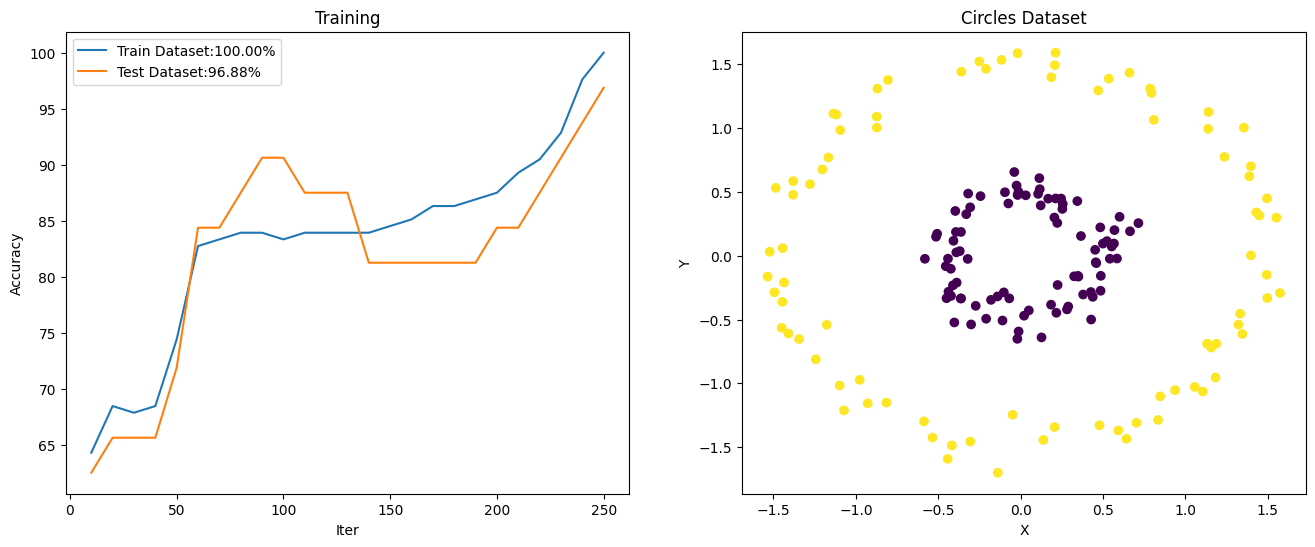

In [35]:
steps = 40
iters = 10

iters_list=[]
evals_train=[]
evals_test=[]

accuracy_train = 0
accuracy_test = 0

for step in range(1,steps+1):
    if accuracy_train > 95.0 and accuracy_test > 95.0:
        break
    model.train(features_train,labels_train,iters,False)
    accuracy_train = model.evaluate(features_train,labels_train)
    accuracy_test = model.evaluate(features_test,labels_test)

    iters_list.append(step*iters)
    evals_train.append(accuracy_train)
    evals_test.append(accuracy_test)

    predictions = model.predict(features_train)
    predictions = get_numeric_labels(predictions)

    fig,(fig1,fig2) = plt.subplots(1,2,figsize=(16,6))
    fig1.plot(iters_list,evals_train,label=f"Train Dataset:{evals_train[-1]:.2f}%")
    fig1.plot(iters_list,evals_test,label=f"Test Dataset:{evals_test[-1]:.2f}%")
    fig1.set_title("Training")
    fig1.set_xlabel("Iter")
    fig1.set_ylabel("Accuracy")
    fig1.legend(loc="upper left")
    fig2.scatter(features_train[:,0],features_train[:,1], c = predictions)
    fig2.set_title("Circles Dataset")
    fig2.set_xlabel("X")
    fig2.set_ylabel("Y")
    plt.show()
    clear_output(wait=True)